In [1]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# file path
os.chdir('C:\\Users\\Khizar\\Desktop\\Semester - Spring 2021\\5 - Machine Learning 4375\\CSV')
path = os.getcwd()
path

# data frame set to data file
df = pd.read_csv('iris.csv')


In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# check how much is missing. How many null values in columns
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
# 0% of the data is missing. But still dropping null vals just in case
df = df.dropna()

In [6]:
pd.get_dummies(df)

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [7]:
#checking unique speciis
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

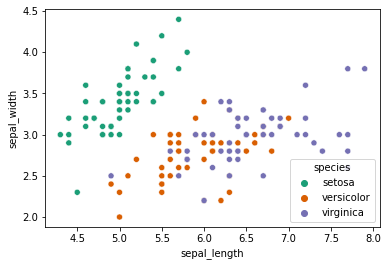

In [8]:
# scatter plot of the length and width of sepals and species identified
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df, hue='species', palette='Dark2')

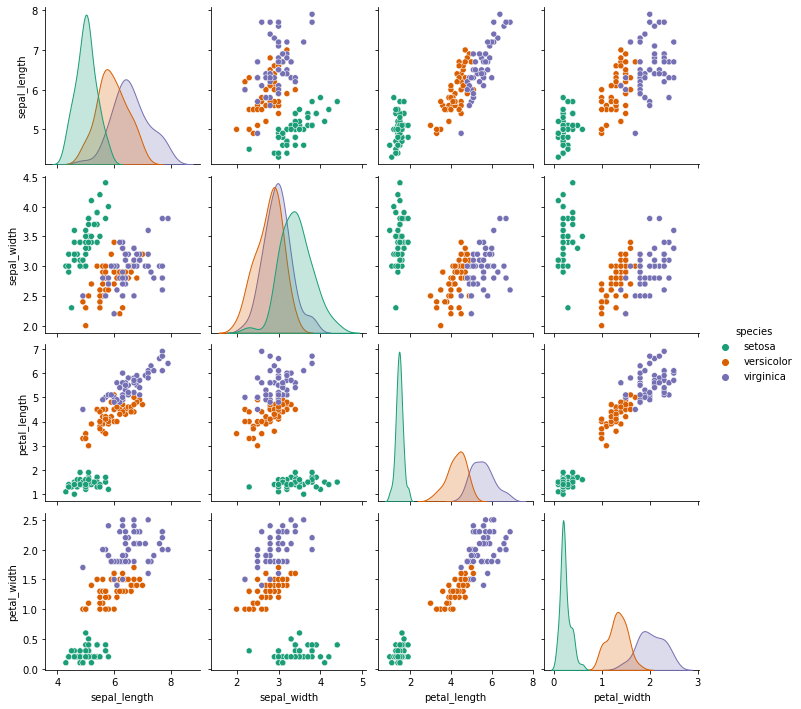

In [9]:
# pair plot with speicies identified
sns.pairplot(df, hue='species', palette='Dark2')

In [10]:
pd.get_dummies(df)

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [11]:
# Setting x and y. y is species, x is the rest of the columsn
x = pd.get_dummies(df.drop('species', axis = 1), drop_first = True)
y = df['species'] 

In [12]:
# more imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [13]:
# doing test train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)
# creating model and fitting
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
predictions = model.predict(x_test)

In [15]:
print(confusion_matrix(y_test, predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


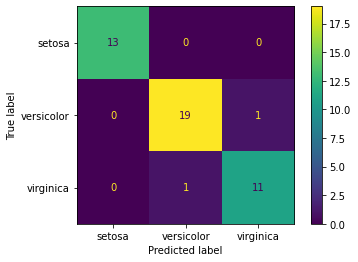

In [16]:
# plotting confusion matrix
plot_confusion_matrix(model, x_test, y_test)

In [17]:
# checking flower feature importance
model.feature_importances_

array([0.        , 0.02153993, 0.5595103 , 0.41894977])

In [18]:
pd.DataFrame(index=x.columns, data = model.feature_importances_, columns = ['Important Features'])

,Important Features
sepal_length,0.00000
sepal_width,0.02154
petal_length,0.55951
petal_width,0.41895


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

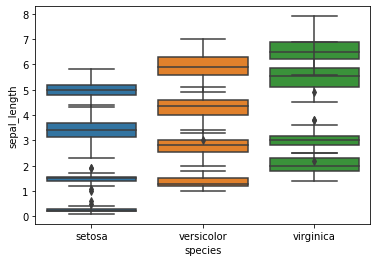

In [19]:
sns.boxplot(x = 'species', y = 'petal_width', data = df)
sns.boxplot(x = 'species', y = 'petal_length', data = df)
sns.boxplot(x = 'species', y = 'sepal_width', data = df)
sns.boxplot(x = 'species', y = 'sepal_length', data = df)

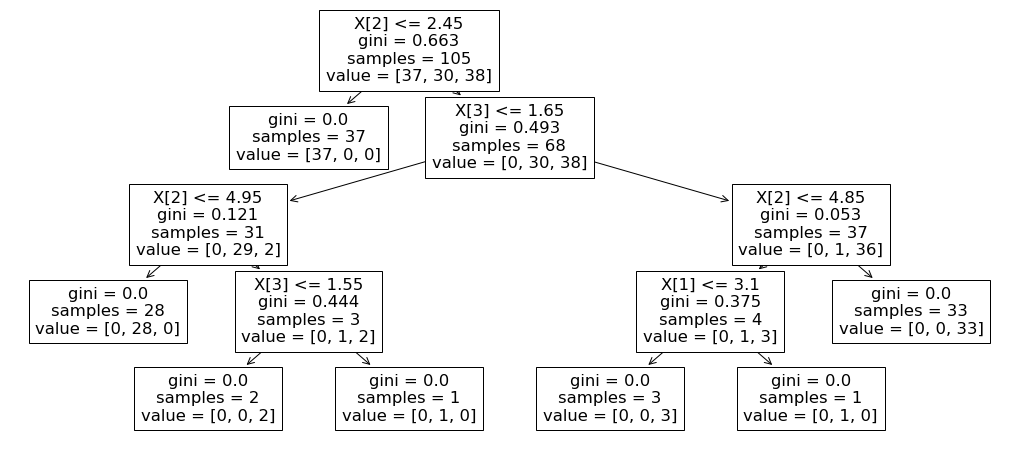

In [20]:
# importing and plotting tree
from sklearn.tree import plot_tree
plt.figure(figsize = (18, 8)) # Setting Figure Size
plot_tree(model);

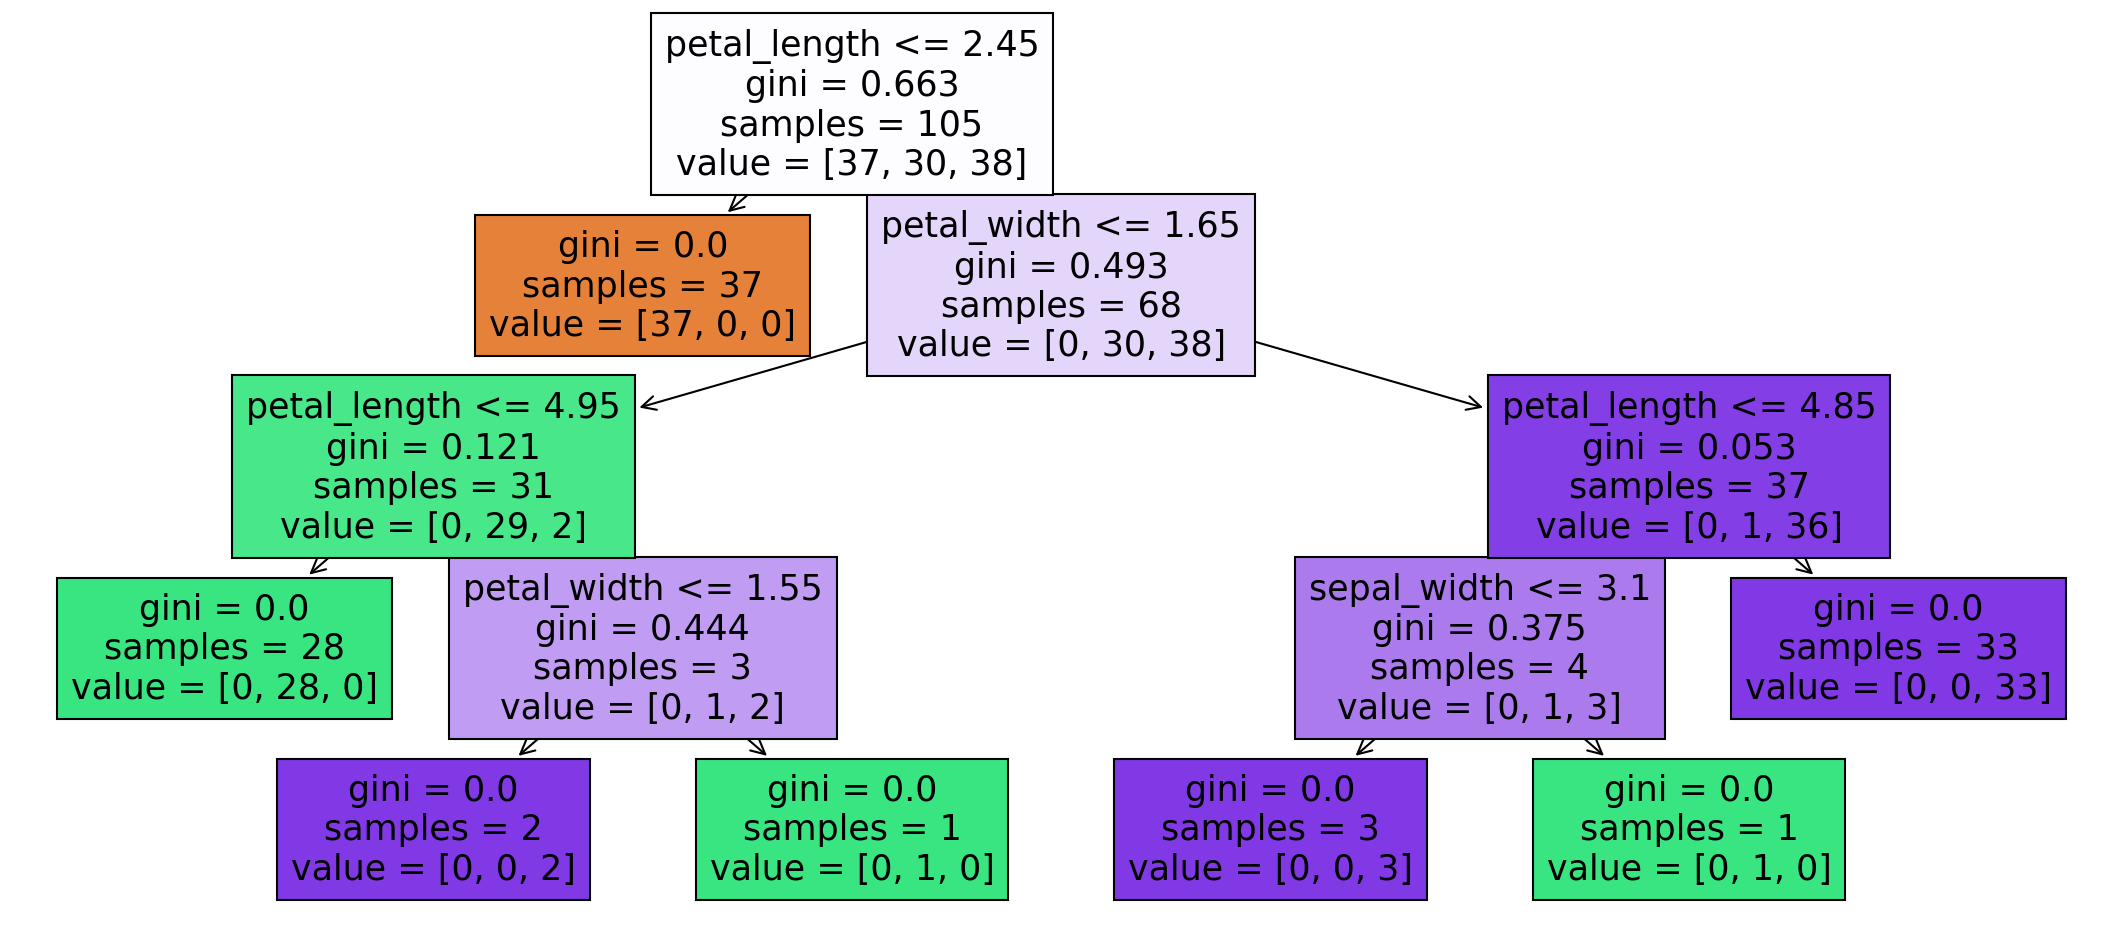

In [21]:
plt.figure(figsize = (18, 8), dpi = 150) # Setting Figure Size and DPI
plot_tree(model, filled = True, feature_names = x.columns);

In [22]:
def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize = (12,8), dpi=150)
    plot_tree(model, filled = True, feature_names = x.columns);

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.90      0.95      0.93        20
   virginica       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45





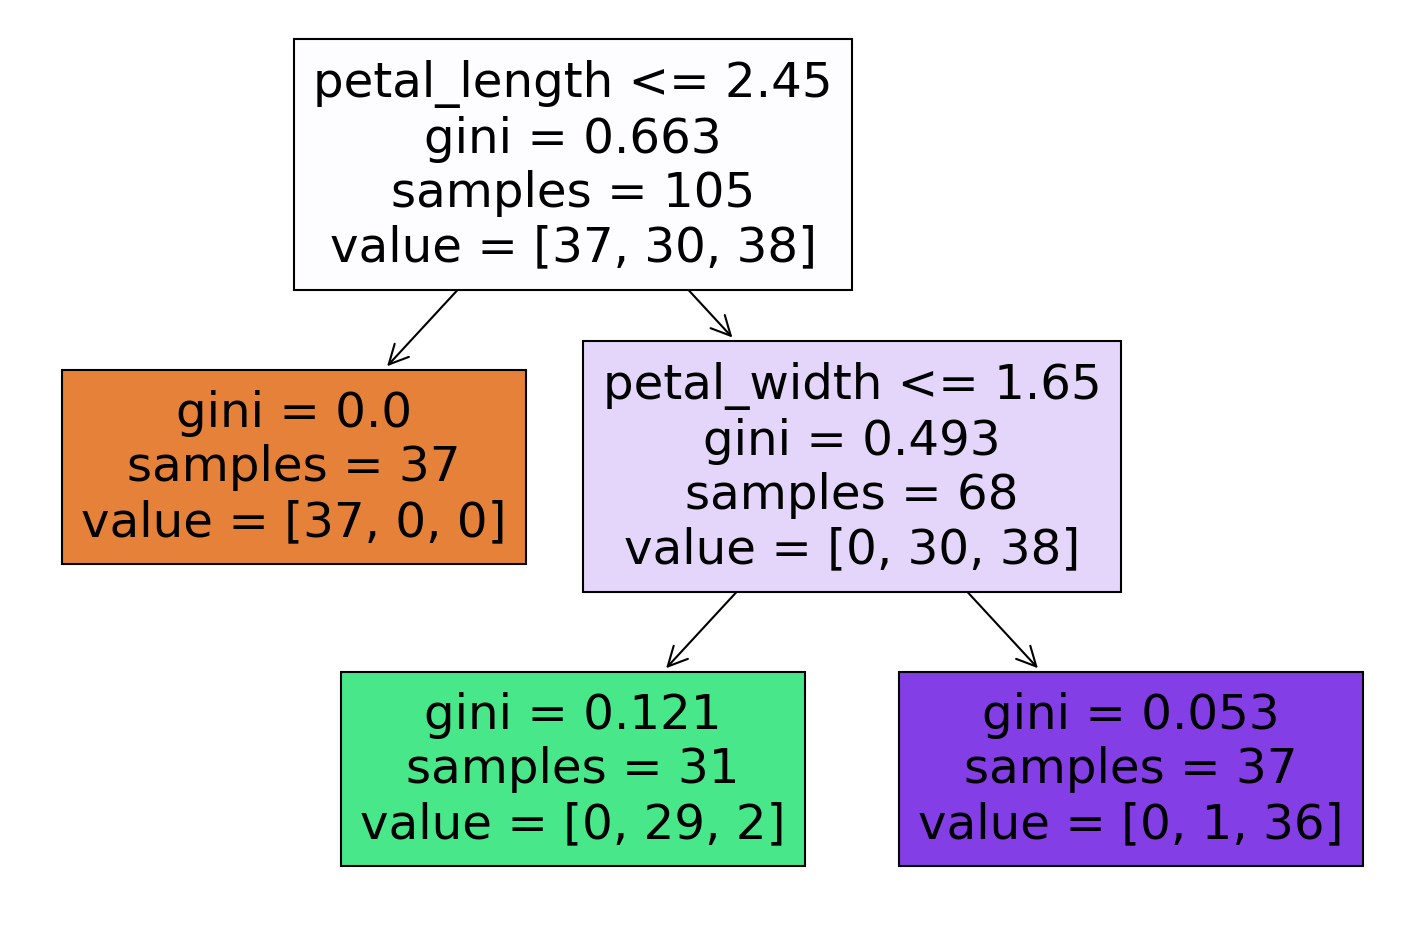

In [23]:
# graphing pruned tree
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(x_train,y_train)
report_model(pruned_tree)

In [24]:
# creating entropy tree
entropy_tree = DecisionTreeClassifier(criterion = 'entropy')
# Fiting x train and y train
entropy_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.95      0.95        20
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45





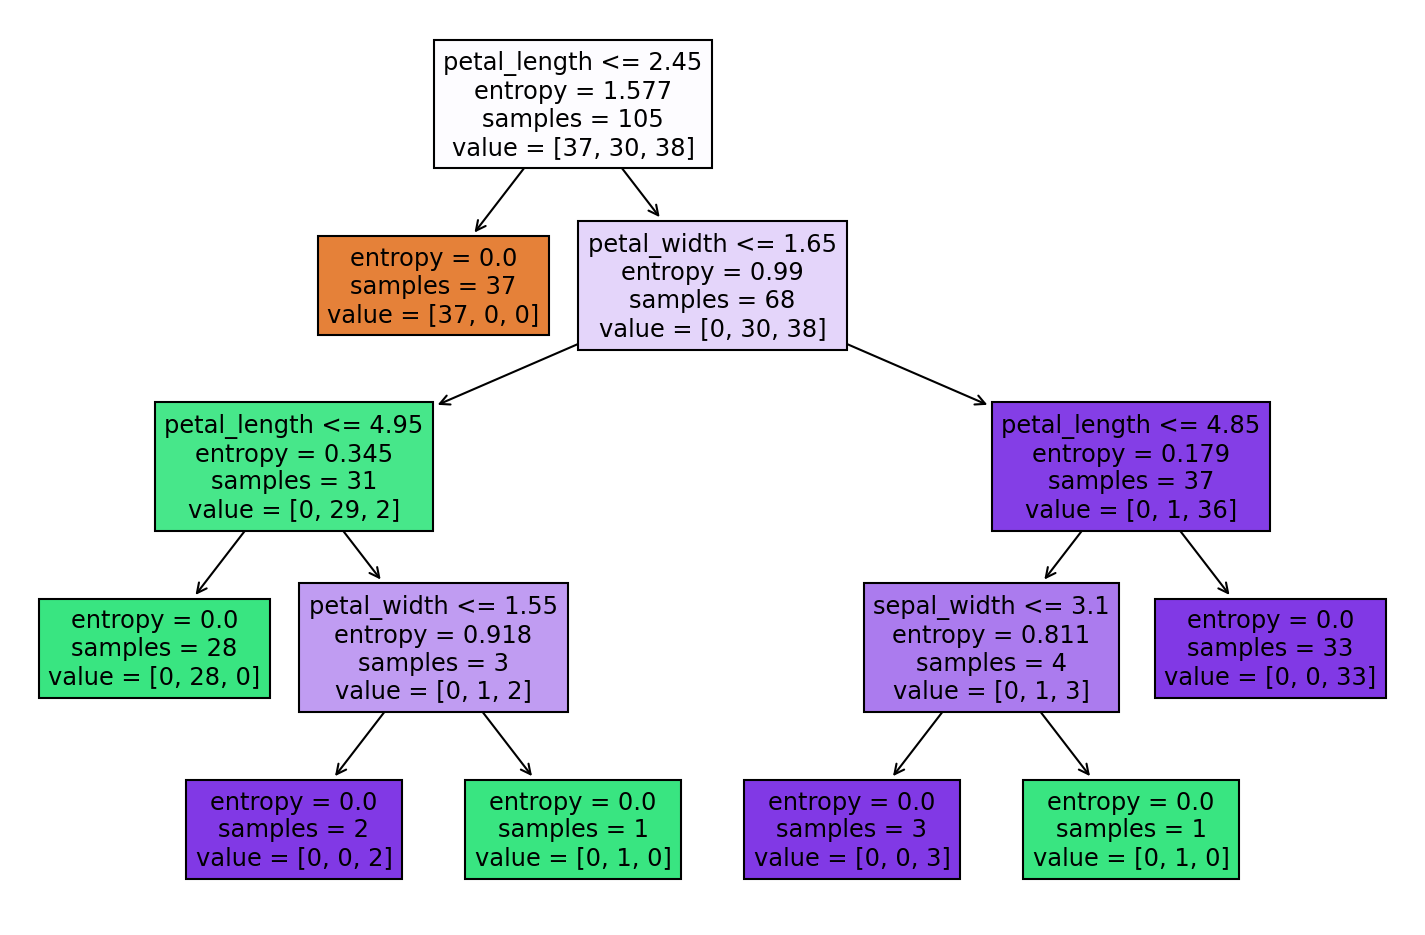

In [25]:
report_model(entropy_tree)